# K means- Clustering

In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
##Creat the data
#import tables
transactions = pd.read_excel("C:/Users/vatsal/Desktop/machine learning/model builidng/data/grocery_database.xlsx", sheet_name = "transactions")
product_areas = pd.read_excel("C:/Users/vatsal/Desktop/machine learning/model builidng/data/grocery_database.xlsx", sheet_name = "product_areas")

In [3]:
#merge on prodct area name
transactions = pd.merge(transactions, product_areas, how = "inner", on ="product_area_id")
transactions


,customer_id,transaction_date,transaction_id,product_area_id,num_items,sales_cost,product_area_name,profit_margin
0,1,2020-04-10,435657533999,3,7,19.16,Fruit,0.14
1,1,2020-07-20,436667313620,3,8,19.99,Fruit,0.14
2,1,2020-07-22,436686191960,3,20,61.69,Fruit,0.14
3,1,2020-08-12,436899350757,3,16,52.28,Fruit,0.14
4,1,2020-08-13,436908803653,3,14,34.58,Fruit,0.14
...,...,...,...,...,...,...,...,...
38501,870,2020-08-07,436848060721,5,3,27.00,Meat,0.11
38502,870,2020-08-16,436933386887,5,4,35.34,Meat,0.11
38503,870,2020-09-21,437291420399,5,2,20.40,Meat,0.11
38504,870,2020-09-23,437316479610,5,4,51.61,Meat,0.11


In [4]:
#drop the non-food category
transactions.drop(transactions[transactions["product_area_name"] == "Non-Food"].index, inplace=True)
transactions

,customer_id,transaction_date,transaction_id,product_area_id,num_items,sales_cost,product_area_name,profit_margin
0,1,2020-04-10,435657533999,3,7,19.16,Fruit,0.14
1,1,2020-07-20,436667313620,3,8,19.99,Fruit,0.14
2,1,2020-07-22,436686191960,3,20,61.69,Fruit,0.14
3,1,2020-08-12,436899350757,3,16,52.28,Fruit,0.14
4,1,2020-08-13,436908803653,3,14,34.58,Fruit,0.14
...,...,...,...,...,...,...,...,...
38501,870,2020-08-07,436848060721,5,3,27.00,Meat,0.11
38502,870,2020-08-16,436933386887,5,4,35.34,Meat,0.11
38503,870,2020-09-21,437291420399,5,2,20.40,Meat,0.11
38504,870,2020-09-23,437316479610,5,4,51.61,Meat,0.11


In [5]:
#aggregate sales at customer level(by product area)
transaction_summary = transactions.groupby(["customer_id", "product_area_name"])["sales_cost"].sum().reset_index()
transaction_summary

,customer_id,product_area_name,sales_cost
0,1,Dairy,367.74
1,1,Fruit,276.00
2,1,Meat,543.38
3,1,Vegetables,167.12
4,2,Dairy,150.63
...,...,...,...
3151,869,Vegetables,168.85
3152,870,Dairy,247.97
3153,870,Fruit,322.90
3154,870,Meat,284.26


In [6]:
#pivot data to place product areas as columns
transaction_summary_pivot = transactions.pivot_table(index = "customer_id",
                                                    columns = "product_area_name",
                                                    values = "sales_cost",
                                                    aggfunc = "sum",
                                                    fill_value = 0,
                                                    margins = True,
                                                    margins_name = "Total").rename_axis(None, axis = 1)
transaction_summary_pivot

,Dairy,Fruit,Meat,Vegetables,Total
customer_id,,,,,
1,367.74,276.00,543.38,167.12,1354.24
2,150.63,120.93,241.21,99.05,611.82
3,46.20,75.39,171.13,31.50,324.22
4,341.91,245.36,272.79,142.35,1002.41
5,694.71,815.32,1405.19,350.10,3265.32
...,...,...,...,...,...
867,129.84,176.73,180.49,88.83,575.89
868,225.59,358.89,343.26,189.24,1116.98
869,126.28,127.50,183.88,168.85,606.51


In [7]:
#turn sales into % sales
transaction_summary_pivot = transaction_summary_pivot.div(transaction_summary_pivot["Total"], axis=0)
transaction_summary_pivot

,Dairy,Fruit,Meat,Vegetables,Total
customer_id,,,,,
1,0.271547,0.203804,0.401244,0.123405,1.0
2,0.246200,0.197656,0.394250,0.161894,1.0
3,0.142496,0.232527,0.527821,0.097156,1.0
4,0.341088,0.244770,0.272134,0.142008,1.0
5,0.212754,0.249691,0.430338,0.107218,1.0
...,...,...,...,...,...
867,0.225460,0.306882,0.313411,0.154248,1.0
868,0.201964,0.321304,0.307311,0.169421,1.0
869,0.208208,0.210219,0.303177,0.278396,1.0


In [8]:
#drop the total column
data_for_clustering=transaction_summary_pivot.drop(["Total"], axis = 1)
data_for_clustering

,Dairy,Fruit,Meat,Vegetables
customer_id,,,,
1,0.271547,0.203804,0.401244,0.123405
2,0.246200,0.197656,0.394250,0.161894
3,0.142496,0.232527,0.527821,0.097156
4,0.341088,0.244770,0.272134,0.142008
5,0.212754,0.249691,0.430338,0.107218
...,...,...,...,...
867,0.225460,0.306882,0.313411,0.154248
868,0.201964,0.321304,0.307311,0.169421
869,0.208208,0.210219,0.303177,0.278396


In [9]:
##Data Preparation and Cleaning
#check for missing values
data_for_clustering.isna().sum()

Dairy         0
Fruit         0
Meat          0
Vegetables    0
dtype: int64

In [12]:
#normalize data
scale_norm = MinMaxScaler()
data_for_clustering_scaled = pd.DataFrame(scale_norm.fit_transform(data_for_clustering), columns =data_for_clustering.columns)
data_for_clustering_scaled

,Dairy,Fruit,Meat,Vegetables
0,0.309044,0.250873,0.432358,0.164665
1,0.280196,0.243305,0.424823,0.216022
2,0.162172,0.286229,0.568751,0.129640
3,0.388187,0.301300,0.293237,0.189487
4,0.242132,0.307357,0.463709,0.143065
...,...,...,...,...
866,0.256592,0.377756,0.337714,0.205820
867,0.229852,0.395509,0.331142,0.226066
868,0.236958,0.258769,0.326687,0.371476
869,0.266506,0.375354,0.289257,0.256806


C:\Users\vatsal\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  "KMeans is known to have a memory leak on Windows "


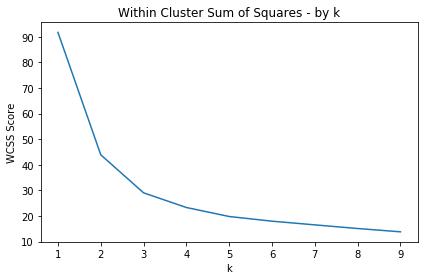

In [14]:
# Use WCSS to find a good value for k
k_values = list(range(1,10))
wcss_list = []
for k in k_values:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(data_for_clustering_scaled)
    wcss_list.append(kmeans.inertia_)
    
plt.plot(k_values, wcss_list)
plt.title("Within Cluster Sum of Squares - by k")
plt.xlabel("k")
plt.ylabel("WCSS Score")
plt.tight_layout()
plt.show()

In [15]:
#Instantiate and Fit the model
kmeans = KMeans(n_clusters = 3, random_state=42)
kmeans.fit(data_for_clustering_scaled)

KMeans(n_clusters=3, random_state=42)

In [17]:
##Use Cluster Information
#Add cluster labels to our data
data_for_clustering["cluster"] = kmeans.labels_
data_for_clustering

,Dairy,Fruit,Meat,Vegetables,cluster
customer_id,,,,,
1,0.271547,0.203804,0.401244,0.123405,0
2,0.246200,0.197656,0.394250,0.161894,0
3,0.142496,0.232527,0.527821,0.097156,0
4,0.341088,0.244770,0.272134,0.142008,0
5,0.212754,0.249691,0.430338,0.107218,0
...,...,...,...,...,...
867,0.225460,0.306882,0.313411,0.154248,0
868,0.201964,0.321304,0.307311,0.169421,0
869,0.208208,0.210219,0.303177,0.278396,0


In [18]:
#check cluster sizes
data_for_clustering["cluster"].value_counts()

0    641
2    127
1    103
Name: cluster, dtype: int64

In [19]:
#Profile our clusters
cluster_summary = data_for_clustering.groupby("cluster")[["Dairy","Fruit","Meat","Vegetables"]].mean().reset_index()
cluster_summary

,cluster,Dairy,Fruit,Meat,Vegetables
0,0,0.220875,0.264605,0.376508,0.138011
1,1,0.002382,0.637796,0.003696,0.356126
2,2,0.363948,0.394152,0.029210,0.212690
